<a href="https://colab.research.google.com/github/Adeseye1907/My_Project_Work/blob/main/Deep_Neural_Network_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- 0. CONFIGURATION AND DATA LOADING ---
Dataset loaded successfully with 11162 rows and 17 columns.
--------------------------------------------------
--- 1. INITIAL ANALYSIS AND VISUALIZATION ---
1.1 Data Information and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-n

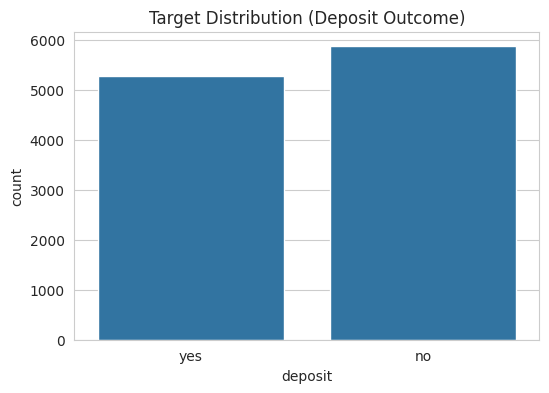


1.3 Target Class Distribution:
No:  52.62%
Yes: 47.38%
The classes are relatively balanced, which is good for training.



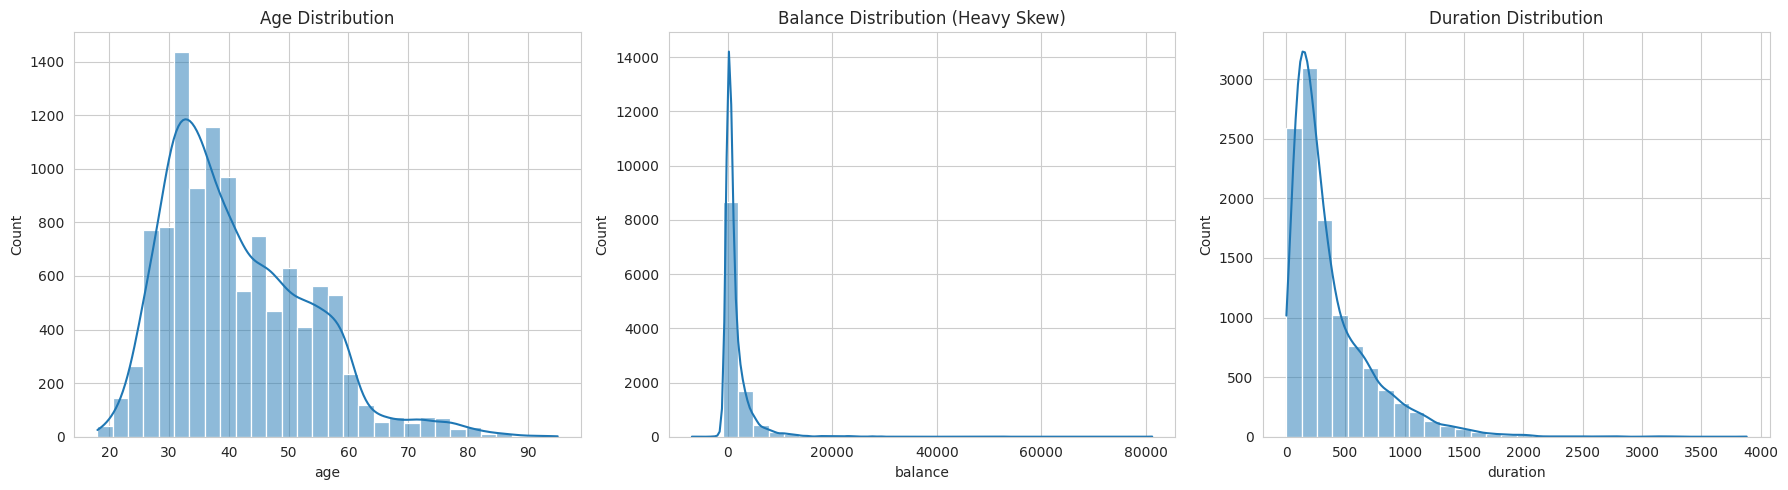

--------------------------------------------------
--- 2. DATA CLEANING AND PREPROCESSING ---
2.1 Categorical columns One-Hot Encoded. New shape: (11162, 43)
2.2 Target variable 'deposit' encoded (Yes=1, No=0).
2.3 Data split: Training samples (8929), Testing samples (2233).
2.4 Numerical features normalized using StandardScaler.
--------------------------------------------------
--- 3. DEEP LEARNING NETWORK BUILDING, TRAINING & EVALUATION ---
3.1 Model Input Dimension: 42 features.

3.4 Model Architecture:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │         1,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,049 (8.00 KB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 0 (0.00 B)


3.5 Model Training...
Training Complete.

3.6 Model Evaluation on Test Set:
Test Loss: 0.3911
Test Accuracy: 85.04%

Classification Report:
              precision    recall  f1-score   support

  No Deposit       0.89      0.82      0.85      1175
     Deposit       0.81      0.89      0.85      1058

    accuracy                           0.85      2233
   macro avg       0.85      0.85      0.85      2233
weighted avg       0.85      0.85      0.85      2233

Confusion Matrix:
[[959 216]
 [118 940]]
--------------------------------------------------
End of Deep Learning Pipeline.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# -----------------------------------------------------------
# 0. Configuration and Data Loading
# -----------------------------------------------------------
print("--- 0. CONFIGURATION AND DATA LOADING ---")

# Load the dataset (Ensure 'bank.csv' is uploaded to Colab session)
try:
    df = pd.read_csv('bank.csv')
    print(f"Dataset loaded successfully with {df.shape[0]} rows and {df.shape[1]} columns.")
except FileNotFoundError:
    print("ERROR: 'bank.csv' not found. Please upload the file to your Colab session.")
    exit()

# Set plot style
sns.set_style("whitegrid")
print("-" * 50)


# -----------------------------------------------------------
# 1. INITIAL ANALYSIS AND VISUALIZATION
# -----------------------------------------------------------
print("--- 1. INITIAL ANALYSIS AND VISUALIZATION ---")

# 1.1 Data Info and Missing Values Check
print("1.1 Data Information and Missing Values:")
df.info()

# 1.2 Target Variable Distribution ('deposit')
plt.figure(figsize=(6, 4))
sns.countplot(x='deposit', data=df)
plt.title('Target Distribution (Deposit Outcome)')
plt.show()

deposit_counts = df['deposit'].value_counts(normalize=True) * 100
print(f"\n1.3 Target Class Distribution:")
print(f"No:  {deposit_counts.loc['no']:.2f}%")
print(f"Yes: {deposit_counts.loc['yes']:.2f}%")
print("The classes are relatively balanced, which is good for training.\n")

# 1.4 Visualize a few key numerical features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['age'], bins=30, kde=True, ax=axes[0]).set_title('Age Distribution')
sns.histplot(df['balance'], bins=30, kde=True, ax=axes[1]).set_title('Balance Distribution (Heavy Skew)')
sns.histplot(df['duration'], bins=30, kde=True, ax=axes[2]).set_title('Duration Distribution')
plt.tight_layout()
plt.show()
print("-" * 50)


# -----------------------------------------------------------
# 2. DATA CLEANING AND PREPROCESSING
# -----------------------------------------------------------
print("--- 2. DATA CLEANING AND PREPROCESSING ---")

# 2.1 Identify feature types
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Remove the target column from categorical list
categorical_cols.remove('deposit')

# 2.2 Handle Categorical Features (One-Hot Encoding)
# Drop first = True is used to avoid multicollinearity
df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print(f"2.1 Categorical columns One-Hot Encoded. New shape: {df_processed.shape}")

# 2.3 Separate Features (X) and Target (y)
X = df_processed.drop('deposit', axis=1)
y = df_processed['deposit']

# 2.4 Encode the Target Variable ('deposit')
# 'yes' -> 1, 'no' -> 0 (Binary Classification Target)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("2.2 Target variable 'deposit' encoded (Yes=1, No=0).")

# 2.5 Split Data
X_train_pre, X_test_pre, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)
print(f"2.3 Data split: Training samples ({len(X_train_pre)}), Testing samples ({len(X_test_pre)}).")

# 2.6 Normalize Numerical Features (Only on the split data to prevent data leakage)
# Identify which columns in the OHE DataFrame are still numerical
numerical_final_cols = [col for col in X_train_pre.columns if X_train_pre[col].dtype in ['int64', 'float64']]

scaler = StandardScaler()
X_train = X_train_pre.copy()
X_test = X_test_pre.copy()

# Fit scaler only on training data and transform both sets
X_train[numerical_final_cols] = scaler.fit_transform(X_train[numerical_final_cols])
X_test[numerical_final_cols] = scaler.transform(X_test[numerical_final_cols])
print("2.4 Numerical features normalized using StandardScaler.")
print("-" * 50)


# -----------------------------------------------------------
# 3. DEEP LEARNING NETWORK
# -----------------------------------------------------------
print("--- 3. DEEP LEARNING NETWORK BUILDING, TRAINING & EVALUATION ---")

# Get the final number of features after OHE and splitting
input_dim = X_train.shape[1]
print(f"3.1 Model Input Dimension: {input_dim} features.")

# 3.2 Build the Model
model = Sequential([
    # Input Layer (Adjust to match the number of input features)
    Dense(units=32, activation='relu', input_shape=(input_dim,)),

    # Hidden Layer 1 (At least one hidden layer with 'relu' activation)
    Dense(units=16, activation='relu'),

    # Hidden Layer 2 (Added complexity)
    Dense(units=8, activation='relu'),

    # Output Layer: Use 'sigmoid' activation for binary classification (Yes/No)
    Dense(units=1, activation='sigmoid')
])

# 3.3 Compile the Model
model.compile(
    optimizer=Adam(learning_rate=0.001), # Optimizer: 'adam' for reliable performance
    loss='binary_crossentropy',           # Loss Function: 'binary_crossentropy' for binary classification
    metrics=['accuracy']
)

print("\n3.4 Model Architecture:")
model.summary()

# 3.5 Train the Model
print("\n3.5 Model Training...")
history = model.fit(
    X_train,
    y_train,
    epochs=50,                      # Adjusted training time
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=0
)
print("Training Complete.")

# 3.6 Evaluate the Model
print("\n3.6 Model Evaluation on Test Set:")

# Predict probabilities
y_pred_prob = model.predict(X_test, verbose=0)

# Convert probabilities to binary class (0 or 1)
y_pred_classes = (y_pred_prob > 0.5).astype("int32")

# Calculate metrics
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%\n")

# Detailed Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=['No Deposit', 'Deposit']))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))
print("-" * 50)
print("End of Deep Learning Pipeline.")
